In [15]:
import warnings
import PyPDF2
import textract
import nltk, re, pprint
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from gensim.models import Word2Vec
from matplotlib import pyplot
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [226]:
!which python

/Users/michael/miniconda3/envs/nlpiaenv/bin/python


In [16]:
CVA_proposal = '/Users/michael/Accounts/Wellesley/CVA-Proposal.pdf'

In [ ]:
# cva_text = textract.process(CVA_proposal).decode()

In [17]:
cvafile = '/Users/michael/Accounts/Wellesley/CVA-Proposal.txt'
file = open(cvafile, 'r')
cva_text = file.read()

In [18]:
cva_text[:100]

'THIS DOCUMENT IS IMPORTANT AND REQUIRES YOUR IMMEDIATE ATTENTION. If you are in \nany doubt as to the'

In [26]:
def chomp(x):
    if x.endswith("\r\n"): return x[:-2]
    if x.endswith("\n") or x.endswith("\r"): return x[:-1]
    return x

In [27]:
def tokenize(text):
    r = re.compile(r"\.?\d*.\d*.\d*\.?\b")
    text = re.sub(r'-\n(\w+ *)', r'\1', text)
    punctuation = ['(',')',';',':','[',']',',', '-', '/']
    stop_words = stopwords.words('english')
    non_words = ['...', '..', '.']
    tokens = word_tokenize(text)
    keywords = [word.lower() for word in tokens 
                if not word in stop_words 
                and not word in punctuation 
                and word not in non_words
                and not r.match(word)
                and not word.startswith('................')                
                and len(word) > 3]
    return keywords

In [28]:
def join_split_words(text):
    return re.sub(r'-\n(\w+ *)', r'\1', text)

In [129]:
len('and,'.split())

1

In [183]:
def join_sentences(sentences):
    for index, sentence in enumerate(sentences):
        tokens = sentence.split()
        if len(tokens) > 0 and len(tokens) < 6:
            preceeding = sentences[index-1]
            if len(preceeding.split()) == 0:
                preceeding = sentences[index-2]
            preceeding = preceeding + ' ' + sentence
            sentences[index-1] = preceeding.strip()
            sentences[index] = ''
    sentences = [sen for sen in sentences if len(sen) > 0]
    return sentences

In [131]:
def clean_sentences(pageText):
    punctuation = ['(',')',';',':','[',']',',', '-', '/']
    stop_words = stopwords.words('english')
    non_words = ['...', '..', '.', '']
    r = re.compile(r"\.?\d*.\d*.\d*\.?\b")
    pageText = join_split_words(pageText)
    sentences = pageText.split('\n')
#     sentences = nltk.sent_tokenize(pageText)
#     sentences = split_sentences(pageText)
    sentences = [word for word in sentences if len(word.strip()) > 0]
    cleanedSentences = [word.strip() for word in sentences 
                if not word in stop_words 
                and not word in punctuation 
                and word not in non_words
                and not r.match(word)
                and not word.startswith('................')
                and len(word) > 3]
    return cleanedSentences

In [199]:
token_length = 8
start = 0
cva_pages = []
indices = [m.start() for m in re.finditer('PRIN \d\/\d', cva_text)]
for index in indices:
    cva_page = prin_text[start:index+token_length]
    cva_pages.append(tokenize(prin_page))
    start = index

In [27]:
# len(prin_pages)

In [186]:
cva_sentences = clean_sentences(cva_text)

In [200]:
cva_sentences[:10]

['THIS DOCUMENT IS IMPORTANT AND REQUIRES YOUR IMMEDIATE ATTENTION. If you are in',
 'any doubt as to the action you should take, you are recommended to seek your own independent',
 'advice from a solicitor, or independent financial advice from an accountant or financial adviser.',
 'This document does not constitute or form any part of any offer or invitation to sell or issue, or any',
 'solicitation of any offer to acquire any Shares or other transferable securities in Wellesley Finance Plc',
 'information is otherwise publicly available or use of any information it contains for any purpose other',
 'than considering the resolutions, is prohibited. Wellesley Finance Plc (the “Company”)',
 'than considering the resolutions, is prohibited. Wellesley Finance Plc (the “Company”) and',
 'each of its CREDITORS (as defined herein) COMPANY VOLUNTARY ARRANGEMENT',
 '(under Part I of the Insolvency Act 1986 and Part II of the Insolvency (England and Wales) Rules 2016)']

In [191]:
cva_sentences = join_sentences(cva_sentences)

In [192]:
cva_sentences[:10]

['THIS DOCUMENT IS IMPORTANT AND REQUIRES YOUR IMMEDIATE ATTENTION. If you are in',
 'any doubt as to the action you should take, you are recommended to seek your own independent',
 'advice from a solicitor, or independent financial advice from an accountant or financial adviser.',
 'This document does not constitute or form any part of any offer or invitation to sell or issue, or any',
 'solicitation of any offer to acquire any Shares or other transferable securities in Wellesley Finance Plc',
 'information is otherwise publicly available or use of any information it contains for any purpose other',
 'than considering the resolutions, is prohibited. Wellesley Finance Plc (the “Company”)',
 'than considering the resolutions, is prohibited. Wellesley Finance Plc (the “Company”) and',
 'each of its CREDITORS (as defined herein) COMPANY VOLUNTARY ARRANGEMENT',
 '(under Part I of the Insolvency Act 1986 and Part II of the Insolvency (England and Wales) Rules 2016)']

In [193]:
r = re.compile(r"\.?\d*.\d*.\d*\.?\b")
tokens = word_tokenize(cva_text)
punctuation = ['(',')',';',':','[',']',',', '-', '/']
stop_words = stopwords.words('english')
non_words = ['...', '..', '.']
keywords = [word.lower() for word in tokens 
            if not word in stop_words 
            and not word in punctuation 
            and word not in non_words
            and not r.match(word)
            and not word.startswith('................')            
            and len(word) > 3]

In [194]:
print(len(keywords))
keywords[:10]

22177


['this',
 'document',
 'important',
 'requires',
 'your',
 'immediate',
 'attention',
 'doubt',
 'action',
 'take']

In [195]:
counter = Counter(keywords)
print(len(counter.items()))
counter.most_common()[:10]

2633


[('company', 830),
 ('creditors', 688),
 ('loan', 332),
 ('creditor', 311),
 ('proposal', 221),
 ('shall', 204),
 ('book', 199),
 ('supervisors', 176),
 ('claim', 165),
 ('loans', 164)]

In [197]:
keywords[:10]

['this',
 'document',
 'important',
 'requires',
 'your',
 'immediate',
 'attention',
 'doubt',
 'action',
 'take']

In [201]:
nltk_text = nltk.Text(keywords)

In [202]:
print(type(nltk_text))
print(len(nltk_text))

<class 'nltk.text.Text'>
22177


In [203]:
nltk_text

<Text: this document important requires your immediate attention doubt...>

In [204]:
nltk_text.collocations()

loan book; preferred shares; book sale; year year; bond documentation;
payment fund; duff phelps; months months; decision procedure;
effective date; voluntary arrangement; listed bondholders; third
party; allowed claim; security trustee; compromised creditors;
insolvency rules; wellesley finance; election period; amount
equivalent


In [205]:
nltk_text.concordance('Cloverleaf')

Displaying 25 of 86 matches:
process loan book ultimately sold cloverleaf terms loan book sale provide sale
ce terms security trust agreement cloverleaf purchaser loans investment capita
d sell listed bond interest loans cloverleaf therefore considered contingent c
ect sell creditors interest loans cloverleaf proceeded notwithstanding directi
ntra-group related entities given cloverleaf subsidiary within group restricti
achieved including minimum profit cloverleaf loans comparative basis offers re
 deferred consideration debenture cloverleaf including charge bank account loa
ccount loans repaid charge shares cloverleaf company negative pledge cloverlea
loverleaf company negative pledge cloverleaf debenture parent guarantee compan
pany preferred bidder transaction cloverleaf offered highest price loan book a
y incorporated subsidiary company cloverleaf need undertake protracted period 
ntinuity borrowers loan servicing cloverleaf included undertaking would vary o
ing following diligence

In [206]:
fdist = nltk.FreqDist(keywords)

In [207]:
fdist.most_common()[-10:]

[('reduce', 1),
 ('served', 1),
 ('vacate', 1),
 ('occupation', 1),
 ('serviced', 1),
 ('showing', 1),
 ('forecasts', 1),
 ('owing', 1),
 ('line', 1),
 ('overleaf', 1)]

In [208]:
fdist.most_common(10)

[('company', 830),
 ('creditors', 688),
 ('loan', 332),
 ('creditor', 311),
 ('proposal', 221),
 ('shall', 204),
 ('book', 199),
 ('supervisors', 176),
 ('claim', 165),
 ('loans', 164)]

In [209]:
for word in sorted(fdist):
    if (fdist[word]) > 0:
        print(word, '->', fdist[word], end='; ')

*administrative -> 2; *excludes -> 2; /surplus -> 5; ability -> 9; able -> 34; abovementioned -> 1; abrogated -> 1; absence -> 3; absolute -> 5; absolutely -> 2; abstract -> 1; accept -> 2; acceptance -> 4; accepted -> 13; accepting -> 2; accepts -> 2; access -> 14; accompanied -> 3; accordance -> 90; according -> 4; accordingly -> 18; account -> 31; accountant -> 6; accountants -> 1; accounting -> 1; accounts -> 6; accruals -> 5; accrued -> 6; accuracy -> 2; accurately -> 2; accustomed -> 1; achievable -> 1; achieve -> 12; achieved -> 9; acknowledgements -> 1; acknowledges -> 2; acquire -> 2; acquired -> 5; acquiring -> 2; acquisition -> 3; acquisitions -> 1; acquitted -> 1; across -> 3; acted -> 2; acting -> 12; action -> 29; actions -> 3; activities -> 8; activity -> 1; acts -> 12; actual -> 7; acute -> 1; added -> 4; addition -> 7; additional -> 8; additionally -> 2; address -> 16; addressed -> 2; addressee -> 1; addresses -> 5; addressing -> 2; adequate -> 1; adjacencies -> 1; adj

 -> 11; decided -> 5; decides -> 1; decision -> 63; decree -> 1; deduct -> 1; deducted -> 1; deed -> 18; deeds -> 2; deem -> 1; deemed -> 12; deep -> 1; default -> 8; defaulted -> 1; defaults -> 13; defending -> 2; deferred -> 19; deficiency -> 5; deficit -> 4; defined -> 7; definition -> 1; definitions -> 9; defrauding -> 1; delay -> 3; delays -> 2; delegated -> 2; deliver -> 11; delivered -> 13; delivering -> 1; delivery -> 2; demand -> 10; demanding -> 1; demands -> 1; demonstrate -> 2; demonstrates -> 1; denmark -> 1; denominated -> 1; depend -> 1; dependent -> 1; deploy -> 2; deployed -> 2; deployment -> 1; deposit -> 4; derived -> 1; described -> 4; describing -> 1; description -> 2; designated -> 2; desirability -> 4; desirable -> 3; detail -> 5; detailed -> 4; details -> 19; determination -> 5; determine -> 7; determined -> 4; determines -> 1; detrimental -> 1; developed -> 3; developers -> 4; developing -> 1; development -> 19; developments -> 18; dictated -> 1; dies -> 1; dif

; limit -> 1; limitation -> 4; limited -> 91; limiting -> 3; limits -> 1; line -> 1; linked -> 1; liquid -> 2; liquidated -> 1; liquidation -> 21; liquidator -> 6; liquidators -> 12; liquidity -> 2; list -> 6; listed -> 57; litigation -> 1; live -> 5; loan -> 332; loaned -> 1; loans -> 164; located -> 2; lock -> 1; lodge -> 1; lodged -> 1; lodges -> 1; log-in -> 2; login -> 2; london -> 26; long -> 3; long-term -> 1; longer -> 13; look -> 3; looking -> 1; lose -> 6; loss -> 19; losses -> 6; lower -> 7; made -> 70; mailed -> 1; main -> 6; mainly -> 1; maintain -> 2; maintained -> 2; maintaining -> 3; majesty -> 1; major -> 3; majorities -> 2; majority -> 5; make -> 36; makes -> 2; making -> 11; manage -> 1; managed -> 3; management -> 5; manager -> 2; managing -> 5; manifest -> 1; manner -> 6; many -> 2; mar-21 -> 1; mar-22 -> 1; mar-23 -> 1; mar-24 -> 1; march -> 6; mark-up -> 1; market -> 12; marketed -> 2; marketing -> 5; marketplace -> 1; masculine -> 1; match -> 2; matched -> 9; ma

; remaining -> 6; remains -> 4; remedy -> 7; remote -> 1; remotely -> 3; remove -> 1; remunerated -> 1; remuneration -> 11; rendered -> 1; renewed -> 1; reoccurring -> 2; reorganisation -> 1; reorganise -> 1; repaid -> 10; repay -> 4; repayable -> 1; repayment -> 16; repayments -> 3; replaced -> 1; replacement -> 1; report -> 7; reported -> 1; reports -> 3; represent -> 4; representations -> 11; represented -> 2; representing -> 1; represents -> 12; reproduction -> 1; repurchase -> 1; repurchases -> 1; request -> 11; requested -> 1; requests -> 6; require -> 13; required -> 27; requirement -> 7; requirements -> 9; requires -> 8; requiring -> 2; requisite -> 6; reregistration -> 3; reserves -> 6; residential -> 4; residual -> 3; resigns -> 1; resolution -> 7; resolutions -> 1; resolve -> 1; resolved -> 9; resources -> 9; resourcing -> 1; respect -> 62; respective -> 22; respectively -> 3; respiratory -> 1; respond -> 2; response -> 1; responsibilities -> 3; responsible -> 4; restated ->

In [64]:
# model = Word2Vec(prin_pages, min_count=10)
# model = Word2Vec(prin_pages)

In [83]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [210]:
from gensim.models.phrases import Phrases, Phraser

In [211]:
sent = [row.split() for row in prin_sentences]

In [212]:
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]

In [213]:
model = Word2Vec(
        sentences,
        size=150,
        window=10,
        min_count=2,
        workers=10,
        iter=10)

In [214]:
# print(model)
words = list(model.wv.vocab)
print(words)

['THIS', 'IMPORTANT', 'AND', 'If', 'you', 'are', 'in', 'any', 'doubt', 'as', 'to', 'the', 'action', 'should', 'seek', 'your', 'own', 'independent', 'advice', 'from', 'a', 'or', 'financial', 'an', 'accountant', 'This', 'document', 'does', 'not', 'constitute', 'form', 'part', 'of', 'offer', 'invitation', 'sell', 'acquire', 'Shares', 'other', 'securities', 'Wellesley', 'Finance', 'Plc', 'information', 'is', 'otherwise', 'available', 'use', 'it', 'contains', 'for', 'purpose', 'than', 'considering', '(the', 'and', 'each', 'its', 'CREDITORS', '(as', 'defined', 'COMPANY', 'VOLUNTARY', 'ARRANGEMENT', 'Part', 'I', 'Insolvency', 'Act', '1986', 'II', '(England', 'Wales)', 'Rules', 'has_been', 'prepared', 'solely', 'inform', 'Creditors', 'Shareholder', 'proposal', 'purpose.', 'Your', 'attention', 'drawn', 'Clause', '1', 'Section', '2', '(Terms', 'Proposal).', 'V', 'Company', 'Voluntary', 'Arrangement)', 'such', 'shall', 'apply', 'throughout', 'this', 'document,', 'Paragraphs', '7', 'Proposal)', '8

In [117]:
print(model['insolvency'])

[ 5.46224341e-02  6.77293018e-02  1.01742223e-01  4.06978354e-02
 -1.76562686e-02 -1.77672156e-03 -2.51807664e-02 -7.66789764e-02
 -2.93093210e-04  8.03943872e-02 -5.48743606e-02 -5.45415953e-02
  5.37305772e-02 -7.61697441e-02 -5.99808991e-02 -6.39456185e-03
  1.86587479e-02  3.57504264e-02 -6.07787743e-02  6.29118755e-02
 -2.23580729e-02 -3.44069935e-02 -1.08535714e-01  7.53645524e-02
 -6.34197593e-02 -2.97993831e-02 -1.71313677e-02 -1.39200184e-02
 -2.70682573e-02 -1.21796345e-02  6.53347746e-02 -6.02977872e-02
 -1.55868623e-02 -2.44250409e-02  1.18750455e-02  7.33246058e-02
 -5.58605865e-02 -9.11274552e-02  1.22223906e-02  1.93641111e-02
  4.12492454e-02 -2.55019702e-02 -8.88713747e-02  3.78188267e-02
 -1.17689483e-02  3.34106945e-02  7.78735206e-02 -2.78493352e-02
 -1.33253276e-01 -1.31254112e-02  9.02257711e-02 -9.57330398e-04
  8.61839801e-02 -4.61854227e-02 -7.14573786e-02 -2.54844353e-02
  1.05094694e-01  1.04558095e-01  7.87011981e-02  6.14059344e-02
  2.66340859e-02  2.57817

In [215]:
vocab_item =  model.wv.vocab['insolvency']
vocab_item.count

7

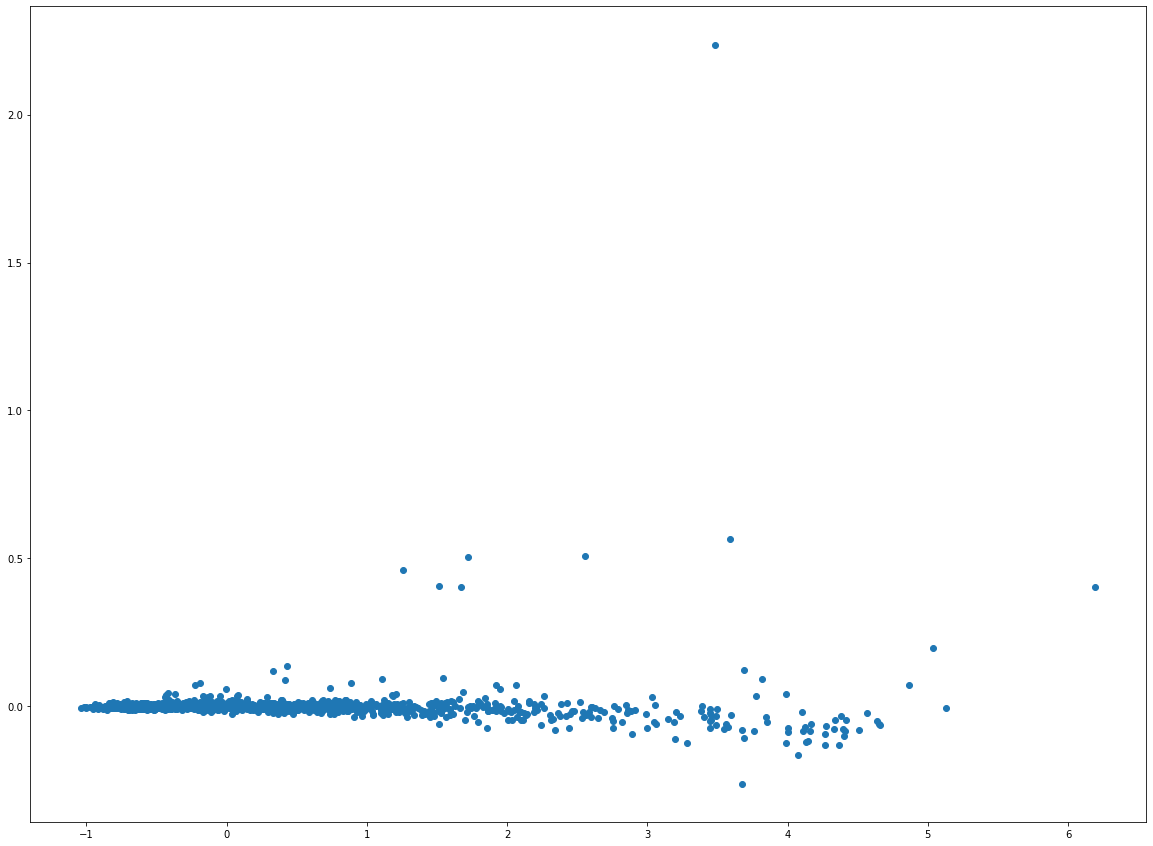

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = model[model.wv.vocab]
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
pyplot.show()

In [216]:
words = list(model.wv.vocab)
print(len(words))
print(words[:50])

2482
['THIS', 'IMPORTANT', 'AND', 'If', 'you', 'are', 'in', 'any', 'doubt', 'as', 'to', 'the', 'action', 'should', 'seek', 'your', 'own', 'independent', 'advice', 'from', 'a', 'or', 'financial', 'an', 'accountant', 'This', 'document', 'does', 'not', 'constitute', 'form', 'part', 'of', 'offer', 'invitation', 'sell', 'acquire', 'Shares', 'other', 'securities', 'Wellesley', 'Finance', 'Plc', 'information', 'is', 'otherwise', 'available', 'use', 'it', 'contains']


In [219]:
pyplot.rcParams["figure.figsize"] = 20,15

In [221]:
model.similarity('insolvency', 'Wellesley')

0.9976705

In [222]:
model.most_similar(negative=['insolvency'])

[('following:', 0.9553602933883667),
 ('matched.', 0.9443317651748657),
 ('admission', 0.9415936470031738),
 ('relief', 0.9308170080184937),
 ('originated', 0.9072624444961548),
 ('informed', 0.7635080218315125),
 ('pence', 0.5272408127784729),
 ('originating', 0.31890958547592163),
 ('Subsidiary', 0.26129046082496643),
 ('Definitions', 0.1299533098936081)]

In [223]:
model.most_similar(positive=['insolvency'])

[('Security', 0.9994882345199585),
 ('than', 0.9994832873344421),
 ('all', 0.9994821548461914),
 ('over', 0.9994820356369019),
 ('legal', 0.9994807839393616),
 ('further', 0.9994783401489258),
 ('WACL', 0.9994767308235168),
 ('Clause', 0.9994748830795288),
 ('from', 0.9994745850563049),
 ('funding', 0.9994733333587646)]

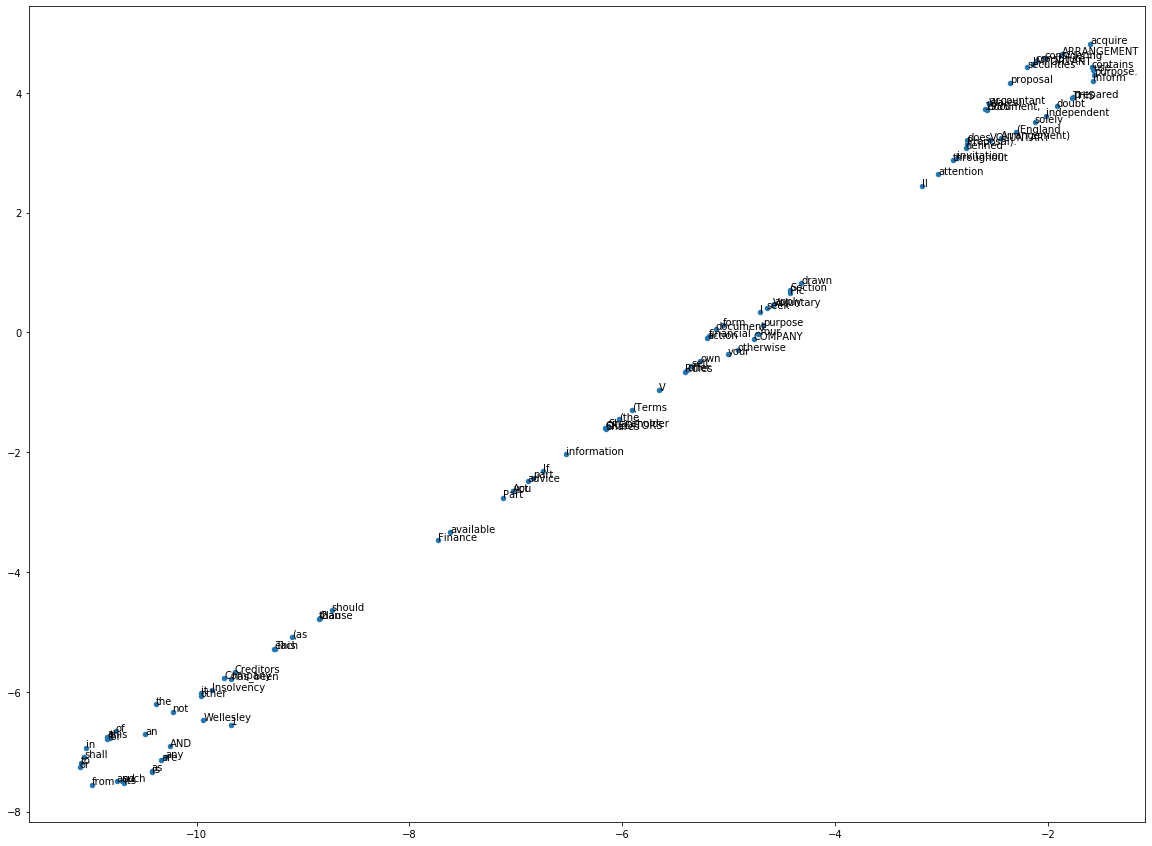

In [224]:
import numpy as np
labels = []
count = 0
max_count = 100
X = np.zeros(shape=(max_count,len(model['insolvency'])))

for term in list(model.wv.vocab):
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()